# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[-1  1 15]
 [ 0  7 12]
 [-1  4 48]
 [-1  9 32]
 [ 2  5 35]]
Simplices
 [[ 2 17 21]
 [ 7  2 21]
 [ 9 22  6]
 [14 28  3]
 [10  9  6]]
Points
 [[[0.62781445 0.6627264 ]
  [0.92474152 0.86051996]
  [0.65864213 0.99512328]]

 [[0.4784485  0.66077066]
  [0.62781445 0.6627264 ]
  [0.65864213 0.99512328]]

 [[0.17675957 0.21105993]
  [0.06967156 0.26407005]
  [0.22705259 0.01660294]]

 [[0.5656836  0.16310761]
  [0.5645526  0.07128753]
  [0.97810644 0.1509875 ]]

 [[0.31515356 0.14960209]
  [0.17675957 0.21105993]
  [0.22705259 0.01660294]]]


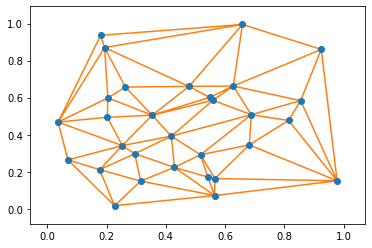

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

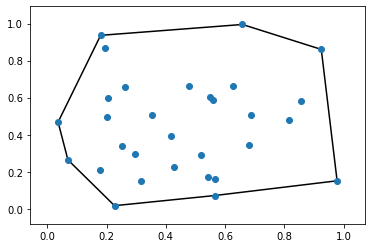

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

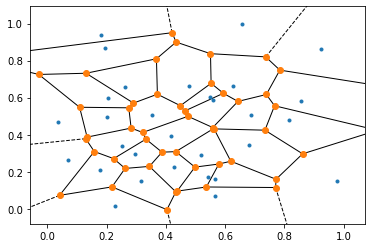

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.5477944  0.60125757]
 [0.81419227 0.4768093 ]
 [0.62781445 0.6627264 ]
 [0.97810644 0.1509875 ]
 [0.51717363 0.29141349]
 [0.68172456 0.34485254]
 [0.22705259 0.01660294]
 [0.4784485  0.66077066]
 [0.85508958 0.58395014]
 [0.17675957 0.21105993]
 [0.31515356 0.14960209]
 [0.55908482 0.58585544]
 [0.20271757 0.49416097]
 [0.18008117 0.93651092]
 [0.5656836  0.16310761]
 [0.29528062 0.29735488]
 [0.26345517 0.65715923]
 [0.92474152 0.86051996]
 [0.3539966  0.50515697]
 [0.2531257  0.34100424]
 [0.19338685 0.87043988]
 [0.65864213 0.99512328]
 [0.06967156 0.26407005]
 [0.4291138  0.2234612 ]
 [0.68834602 0.50784619]
 [0.20454591 0.59867358]
 [0.41865719 0.39223071]
 [0.54183952 0.17124513]
 [0.5645526  0.07128753]
 [0.03652941 0.46802798]]


In [8]:
%%timeit

tree.query((0.5,0.5))

39.3 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

507 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

3.38 ms ± 70.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

914 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.014331311151596228, 4492)
(0.014331311151596228, 4492)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

49.2 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

43.3 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

954 µs ± 30.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

50.3 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
